In [18]:
import numpy as np 
import pandas as pd 

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt

%matplotlib inline

# Interactive outputs of notebook

There are many applications in which you can run your Python code, such as IDE and Notebooks, We choose  notebooks for some reasons，

- Notebook combined with Python provides a quite efficient toolkit for prototyping.

- Notebook can provide fully interactive outputs, you can write/change the code and observe (print) the effects immediately, without running the entire "program".

That means:

- After you execute a statement, e.g., defining a variable and giving it a value, you can (and perhaps should) immediately just check the value by printing it.

- Write some code (or change some code), you can observe the results immediately (fix/modify as you go).


In [19]:
A = 3
# print(A)

B = 0.1
# print(B)

C = [1,2,3,5]
# print(C)

D = np.array([1,2,3,5])
# print(D)

A
D

array([1, 2, 3, 5])

In [20]:
# print()  vs type()
print(C)
print(D)

[1, 2, 3, 5]
[1 2 3 5]


In [21]:
type(C)

list

In [22]:
type(D)

numpy.ndarray

In [23]:
def sum_num(X):
    s = np.sum(X)
    return s

In [24]:
print(C)
sum_num(C)

[1, 2, 3, 5]


11

In [25]:
# misusing of print() and return

def func1(X):
    m = np.mean(X)
    return m

def func2(X):
    m = np.mean(X)
    print(m)

In [26]:
func1(A)

3.0

In [27]:
func2(A)

3.0


In [28]:
output1 = func1(A)
output2 = func2(A)

3.0


In [29]:
print("output1 is: ",output1)
print("output2 is: ",output2)

output1 is:  3.0
output2 is:  None


In [30]:
type(output1)

numpy.float64

In [31]:
type(output2)

NoneType

# ML diagnosis：underfitting and overfitting


## Learning goals
- Train a model on the training set, and then compute train/validation  error/accuracy to detect underfitting/overfitting
- Use k-fold CV as a more advanced version of single train/val 
- Select between different models based on validation error/accuracy

- Understand how model size influence the performance of a model
- Understand how regularization strength influence the performance of a model

## Underfitting and overfitting of regression task
**Using simulated dataset to illustrate how model size（polynomial degree）and regularization strength affect model's performance on training set and validation set：model being underfitted, overfitted or properly fitted:**

- The left plot shows a properly fitted model.

- The right plot is for you to play around, you can try out different values for poly degree, alpha to see the effect.

In [32]:
def make_data(N=30, err=0.8, seed=1):
    
    """Use a complicated function to simulate real-life dataset：intrinsic relation + noise""" 
    
    rng = np.random.RandomState(seed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1) # intrinsic relation between X and y
    y += err * rng.randn(N)  # noise 
    return X, y

# err is std of noise, that means err**2 is the variance of y given x, i.e. Bayes error

def PolynomialRegression(degree=1, regularization=True, alpha=None):
    
    "concatenate polynomial feature transformer and linear models to facilitate hyperparamter tuning"
    
    if regularization==True:
        return make_pipeline(PolynomialFeatures(degree),
                         Ridge(alpha=alpha,fit_intercept=False))
    else:
        return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(fit_intercept=False))
    
def plot_underfit_overfit():
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
    
    xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
    ax[0].scatter(X.ravel(), y, s=40, c='blue',label='training set')
    ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray',label='h(x)')
    ax[0].axis([-0.1, 1.0, -2, 14])
    ax[0].set_title('MSE on training set: {:.5}\n MSE on val set: {:.5}'.format(train_mse1,val_mse1),fontsize=14)
    ax[0].scatter(X_val.ravel(), y_val, s=40, c='red',label='validation set')
    ax[0].set_xlabel('X  (Feature)')
    ax[0].set_ylabel('y  (label)')
    ax[0].legend(loc="lower right")

    ax[1].scatter(X.ravel(), y, s=40, c='blue',label='training set')
    ax[1].plot(xfit.ravel(), model2.predict(xfit), color='gray',label='h(x)')
    ax[1].axis([-0.1, 1.0, -2, 14])
    ax[1].set_title('MSE on training set: {:.5}\n MSE on val set: {:.5}'.format(train_mse2,val_mse2),fontsize=14)
    ax[1].scatter(X_val.ravel(), y_val, s=40, c='red',label='validation set')
    ax[1].set_xlabel('X (Feature)')
    ax[1].legend(loc="lower right")
    plt.show()

Bayes Error: 0.6400000000000001


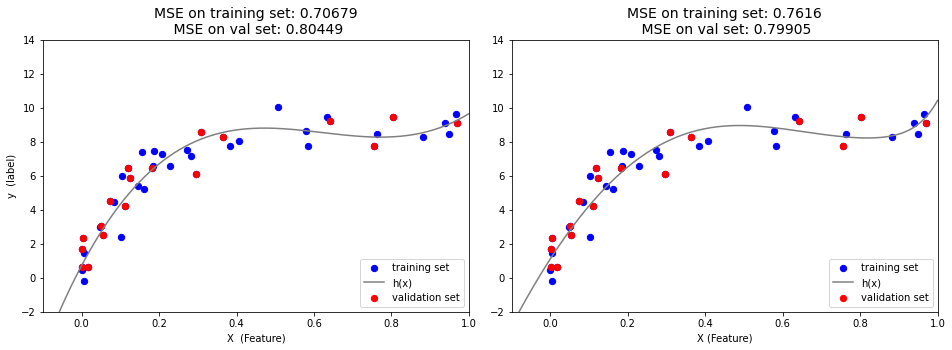

In [41]:
## Try different hyperparameters to tune model complexity and regularization strength 
## and illustrate underfitting/overfitting

DEGREE = 15   # Polynomial degree to control the size of the model
R = True     # Regularize or not, If True, use Ridge model(L_2 regularizetion), if False, use plain linear regression model
ALPHA = 0.001   # Manipulate the regularization strength of Ridge, larger values specify stronger regularization

N = 45
ERR = 0.8 # std of noise, ERR**2 is variance of y given x, i.e. Bayes error / irreducible error
X, y = make_data(N=N, err=ERR, seed=8)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=0) # training, val set split

model1 = PolynomialRegression(degree = 3,regularization=False,alpha=None).fit(X_train, y_train) #train a linear regression model
model2 = PolynomialRegression(degree = DEGREE,regularization=R,alpha=ALPHA).fit(X_train, y_train) #train a Ridge model

y1 = model1.predict(X_train); train_mse1 = mse(y1,y_train); y2 = model2.predict(X_train); train_mse2 = mse(y2,y_train)
y1_val = model1.predict(X_val); val_mse1 = mse(y1_val,y_val); y2_val = model2.predict(X_val); val_mse2 = mse(y2_val,y_val)

print("Bayes Error:",ERR**2)  # Bayes error / noise / irreducible error
# Bayes error is the lowest possible prediction error that can be achieved and is the same as irreducible error 
plot_underfit_overfit()

**The figure below** shows
training MSE decreases monotonically as the polynomial degree increases, while validation MSE initially decreases but eventually starts to increase again.

[sklearn.model_selection.cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) is used here to do k-fold cross validation to make the code concise, it is efficient, but wraps all details. If you don't understand this block of code, no worries, in assignment4, you will see a detailed demo of k-fold cross validation.

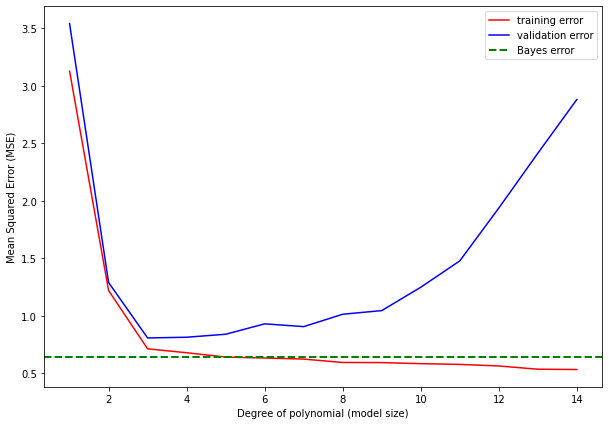

In [42]:
from sklearn.model_selection import cross_validate

# cross_validate() expects a scorer object for the parameter scoring. All scorer objects follow the convention 
# that higher return values are better than lower return values, so "neg_mean_squared_error" is returned here
# see https://scikit-learn.org/stable/modules/model_evaluation.html for more details
ERR = 0.8
X, y = make_data(45,err=ERR,seed=8)  # generate dataset
def plot_errors_reg():
    fig, axs = plt.subplots(figsize=(10,7))
    train_errs = []
    val_errs = []
    degrees = range(1,15)
    for degree in degrees :
        # Sklearn use "estimator" to refer to regressor/classifier
        estimator = PolynomialRegression(degree = degree,regularization=False,alpha=None) # initialize a regressor
        
        # cross_validate() returns a dictionary of arrays containing the training scores, validation scores, etc.
        cv_results = cross_validate(estimator, X, y, cv=5,scoring="neg_mean_squared_error",return_train_score=True)
        
        average_train_error = (-cv_results['train_score']).mean() # calculate averaged train error of k folds
        average_val_error = (-cv_results['test_score']).mean() # calculate averaged validation error of k folds
        
        train_errs.append(average_train_error) # stack training errors into a list
        val_errs.append(average_val_error)# stack validation errors into a list
        
    axs.plot(degrees,train_errs,color='red',label='training error')
    axs.plot(degrees,val_errs,color='blue',label='validation error')
    axs.axhline(y=ERR**2,linewidth=2, color='g',ls="--",label="Bayes error")
    axs.set_xlabel('Degree of polynomial (model size)')
    axs.set_ylabel('Mean Squared Error (MSE)')
    axs.legend()
    
plot_errors_reg()

## You try it
Try to plot a figure showing how regularization strength (alpha) influences the performance of a model, i.e. how training error and validation error evolves.

Use a larger polynomial degree, say 10, and then change alpha in $[10^{-4},10^{-3},10^{-2},10^{-1},1,10,10^{2}]$

## Automatically search for best hyperparameters (polynomial degree and alpha)
GridSearchCV provides efficient method to search for best hyperparameters.

In [45]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {'polynomialfeatures__degree':range(1,15)} # parameter range we want to search

# Sklearn use "estimator" to refer to regressor/classifier
estimator = PolynomialRegression(regularization=False) # initialize a regressor

# Similarly,GridSearchCV() also expects a scorer object for the parameter scoring
regr = GridSearchCV(estimator=estimator,scoring = "neg_mean_squared_error",param_grid=parameters,cv=5)
regr.fit(X,y)

print("The lowest MSE we can get on validation set is: ",-regr.best_score_)
print("It's corresponding polynomial degree is: ", regr.best_params_)

The lowest MSE we can get on validation set is:  0.8077153847079636
It's corresponding polynomial degree is:  {'polynomialfeatures__degree': 3}


In [49]:
parameters = {'polynomialfeatures__degree':range(1,15),'ridge__alpha': np.logspace(-5,5,11)}
estimator = PolynomialRegression(regularization=True)

regr = GridSearchCV(estimator=estimator,scoring = "neg_mean_squared_error",param_grid=parameters,cv=5)
regr.fit(X,y)

print("The lowest MSE we can get on validation set is: ",-regr.best_score_)
print("It's corresponding polynomial degree is: ", regr.best_params_)

The lowest MSE we can get on validation set is:  0.8039945063359261
It's corresponding polynomial degree is:  {'polynomialfeatures__degree': 4, 'ridge__alpha': 0.0001}


## Underfitting and overfitting of classification task
**Using a dataset from Kaggle to illustrate how model size（polynomial degree）and regularization strength affect model's performance on training set and validation set：model being underfitted, overfitted or properly fitted**

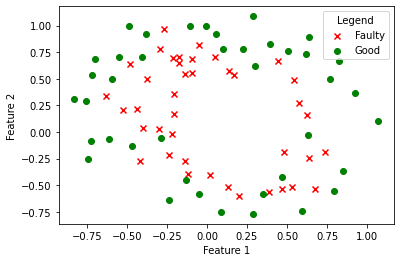

In [50]:
#Load Dataset for Logistic Regression
data = pd.read_csv('ex2data2.txt', header=None, names = ['feature 1', 'feature 2', 'faulty'])
data = data.sample(80,random_state=2) #randomly select 80 samples

pos = data['faulty'] == 1 
neg = data['faulty'] == 0

# Visualize the dataset
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.scatter(data.loc[pos, 'feature 1'], data.loc[pos, 'feature 2'], color = 'r', marker='x', label='Faulty')
axes.scatter(data.loc[neg, 'feature 1'], data.loc[neg, 'feature 2'], color = 'g', marker='o', label='Good')
axes.legend(title='Legend', loc = 'best' )

In [55]:
## construct training and test set
X = data.iloc[:, :2].to_numpy() # construct feature matrix, X.shape==(80,2), y.shape==(80,)
y = data.iloc[:,-1].to_numpy() # construct label vector

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42) # training, val set split

tr_p_idx = np.where(y_train == 1)[0] # indices of faulty samples in training set
tr_n_idx = np.where(y_train == 0)[0] # indices of good samples in training set
te_p_idx = np.where(y_val == 1)[0] # indices of faulty samples in val set
te_n_idx = np.where(y_val == 0)[0] # indices of good samples in val set

In [56]:
def polt_logistic_boundary(clf):
    
    def Boundary(theta, axes):

        """Plot the decision boundary"""

        u = np.linspace(-0.75, 1, 50)
        v = np.linspace(-0.75, 1, 50)
        U,V = np.meshgrid(u,v)
        # convert U, V to vectors for calculating additional features
        # using vectorized implementation
        U = np.ravel(U)
        V = np.ravel(V)
        Z = np.zeros((len(u) * len(v)))

        F = np.array([U,V]).T # concatenate U, V to create feature matrix
        F_p = poly.fit_transform(F) 
        Z = F_p.dot(theta.T) # Z(F_p) 

        # reshape U, V, Z back to matrix
        U = U.reshape((len(u), len(v)))
        V = V.reshape((len(u), len(v)))
        Z = Z.reshape((len(u), len(v)))

        cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
        axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
        return cs
    
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(15, 5)
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].scatter(X_train[tr_p_idx,0], X_train[tr_p_idx, 1], color = 'r', marker='x', label='Faulty')
    axes[0].scatter(X_train[tr_n_idx,0], X_train[tr_n_idx, 1], color = 'g', marker='o', label='Good')
    axes[0].legend(title='Legend', loc = 'best' )
    axes[0].set_title('accuracy on training set: {}'.format(clf.score(X_poly,y_train)),fontsize=14)
    Boundary(clf.coef_, axes[0])

    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].scatter(X_val[te_p_idx,0], X_val[te_p_idx, 1], color = 'orange', marker='x', label='Faulty')
    axes[1].scatter(X_val[te_n_idx,0], X_val[te_n_idx, 1], color = 'b', marker='o', label='Good')
    axes[1].legend(title='Legend', loc = 'best' )
    axes[1].set_title('accuracy on validation set: {}'.format(clf.score(poly.transform(X_val),y_val)),fontsize=14)
    Boundary(clf.coef_, axes[1])
    
    plt.show()

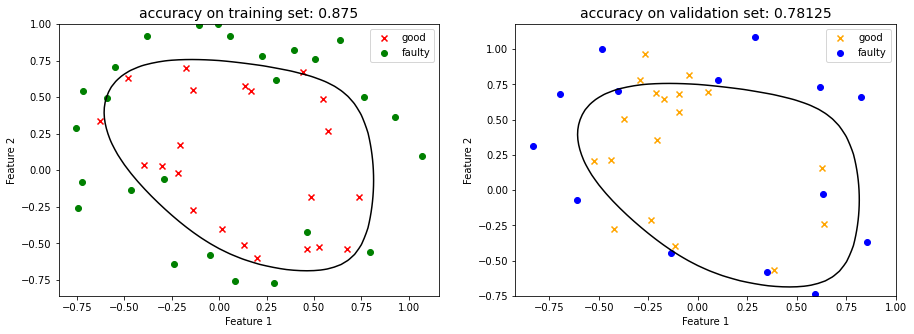

In [65]:
## Try different hyperparameters to tune model complexity and regularization strength 
## and illustrate underfitting/overfitting

# C is the inverse of regularization strength, smaller values specify stronger regularization

DEGREE = 12
C = 100

poly = PolynomialFeatures(degree=DEGREE)  
X_poly = poly.fit_transform(X_train)

clf = LogisticRegression(fit_intercept=False,C=C,max_iter=1000)
clf = clf.fit(X_poly,y_train)

polt_logistic_boundary(clf)

**The figure below** shows
training accuracy increases monotonically as the regularization penalty gets weak, while validation accuracy initially iecreases but eventually starts to decrease.

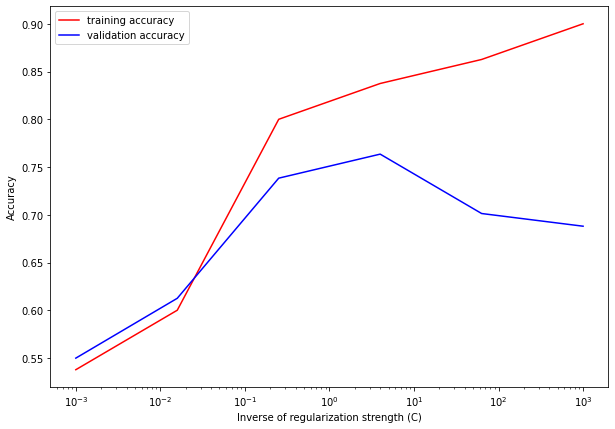

In [66]:
poly = PolynomialFeatures(degree=10) 
X_poly = poly.fit_transform(X)

def plot_accus_clf():
    fig, axs = plt.subplots(figsize=(10,7))
    
    train_errs = []
    val_errs = []
    
    Cs = np.logspace(-3, 3, num=6) # the range for C
    
    for C in Cs :
        estimator = LogisticRegression(fit_intercept=False,C=C,max_iter=1000)
        
        # for classification task, we use "accuraccy" as scoring metric
        cv_results = cross_validate(estimator, X_poly, y,cv=3,scoring="accuracy",return_train_score=True)
        
        averaged_train_error = (cv_results['train_score']).mean()
        averaged_val_error = (cv_results['test_score']).mean()
        
        train_errs.append(averaged_train_error)
        val_errs.append(averaged_val_error)
        
    axs.plot(Cs,train_errs,color='red',label='training accuracy')
    axs.plot(Cs,val_errs,color='blue',label='validation accuracy')
    axs.set_xlabel('Inverse of regularization strength (C)')
    axs.set_ylabel('Accuracy')
    axs.set_xscale('log')
    axs.legend()
    
plot_accus_clf()

## You try it
Try to plot a figure showing how polynomial degree influences the performance of a model, i.e. how training accuracy and validation accuracy evolves.

## Underfitting and overfitting for Tree models

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
def plot_tree_bondary():
    """ auxiliary function to plot decision boundary for tree models"""
    def Boundary(axes):
        u = np.linspace(-1, 1.2, 50)
        v = np.linspace(-1, 1.2, 50)
        U,V = np.meshgrid(u,v)
        U = np.ravel(U)
        V = np.ravel(V)

        Z = clf_tree.predict(np.array([U,V]).T)

        U = U.reshape((len(u), len(v)))
        V = V.reshape((len(u), len(v)))
        Z = Z.reshape((len(u), len(v)))
        cs = axes.contourf(U, V, Z, cmap='twilight')
        return cs

    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(15, 5)

    Boundary(axes[0])
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].scatter(X_train[tr_p_idx,0], X_train[tr_p_idx, 1], color = 'r', marker='x', label='Faulty')
    axes[0].scatter(X_train[tr_n_idx,0], X_train[tr_n_idx, 1], color = 'g', marker='o', label='Good')
    axes[0].legend(title='Legend', loc = 'best' )
    axes[0].set_title('accuracy on training set: {}'.format(clf_tree.score(X_train,y_train)),fontsize=14)

    Boundary(axes[1])
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].scatter(X_val[te_p_idx,0], X_val[te_p_idx, 1], color = 'yellow', marker='x', label='Faulty')
    axes[1].scatter(X_val[te_n_idx,0], X_val[te_n_idx, 1], color = 'b', marker='o', label='Good')
    axes[1].legend(title='Legend', loc = 'best' )
    axes[1].set_title('accuracy on validation set: {}'.format(clf_tree.score(X_val,y_val)),fontsize=14)
    plt.show()

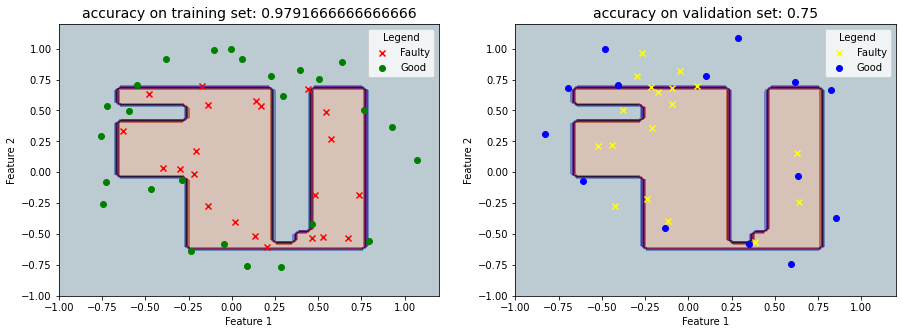

In [77]:
MAX_DEPTH = 10

clf_tree = DecisionTreeClassifier(max_depth=MAX_DEPTH,random_state=10)
clf_tree.fit(X_train,y_train) # use the same dataset as logistic regression

plot_tree_bondary()

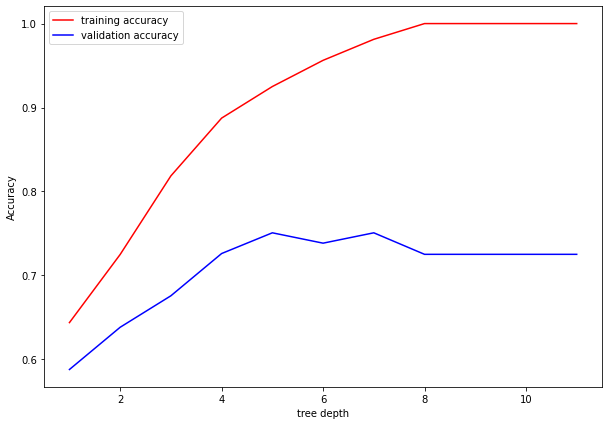

In [76]:
def plot_accu_tree():
    fig, axs = plt.subplots(figsize=(10,7))
    
    train_errs = []
    val_errs = []
    
    depths = range(1,12)
    
    for d in depths :
        estimator = DecisionTreeClassifier(max_depth=d,random_state=10)
        
        cv_results = cross_validate(estimator, X, y, cv=3,scoring="accuracy",return_train_score=True)
        
        averaged_train_error = (cv_results['train_score']).mean()
        averaged_val_error = (cv_results['test_score']).mean()
        
        train_errs.append(averaged_train_error)
        val_errs.append(averaged_val_error)
        
    axs.plot(depths,train_errs,color='red',label='training accuracy')
    axs.plot(depths,val_errs,color='blue',label='validation accuracy')
    axs.set_xlabel('tree depth')
    axs.set_ylabel('Accuracy')
    axs.legend()
    
plot_accu_tree()